### 1. <a id='importation'>Détail des données fournies</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer


# Ignorer les avertissements
warnings.filterwarnings('ignore')
path = "../data/"

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement et initialisation des données</a>

In [3]:
#On vient charger les différents dataset
employee_df = pd.read_csv(path + "employee_survey_data.csv")
general_df = pd.read_csv(path + "general_data.csv")
manager_df = pd.read_csv(path + "manager_survey_data.csv")
in_time_df = pd.read_csv(path + "in_time.csv")
out_time_df = pd.read_csv(path + "out_time.csv")

dataframes = [
    ("employee_df", employee_df),
    ("general_df", general_df),
    ("manager_df", manager_df),
    ("in_time_df", in_time_df),
    ("out_time_df", out_time_df)
]

for name, df in dataframes:
    print(DELIMITER)
    print(f"Nom du DataFrame : {name}")
    print(f"Description : {df.describe()}")
    print(f"Valeurs nulles : ")
    print(f"{df.isnull().sum()}")


--------------------------------
Nom du DataFrame : employee_df
Description :        EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
count     4410.00                  4385.00          4390.00          4372.00
mean      2205.50                     2.72             2.73             2.76
std       1273.20                     1.09             1.10             0.71
min          1.00                     1.00             1.00             1.00
25%       1103.25                     2.00             2.00             2.00
50%       2205.50                     3.00             3.00             3.00
75%       3307.75                     4.00             4.00             3.00
max       4410.00                     4.00             4.00             4.00
Valeurs nulles : 
EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64
--------------------------------
Nom du DataFrame : general_df
Description :  

---

Résumé des différentes données présentes dans les dataset:

**Dataset employee_survey_data**
| #  | Colonne                   | Type      | Description                                    | Valeurs manquantes | Moyenne | Médiane | Min | Max |
|----|---------------------------|-----------|-----------------------------------------------|--------------------|---------|---------|-----|-----|
| 1  | EmployeeID                | int64     | Identifiant unique pour chaque employé       | 0                  | -       | -       | -   | -   |
| 2  | EnvironmentSatisfaction   | float64   | Satisfaction par rapport à l’environnement   | 25                 | 2.72    | 3       | 1   | 4   |
| 3  | JobSatisfaction           | float64   | Satisfaction au travail                      | 20                 | 2.73    | 3       | 1   | 4   |
| 4  | WorkLifeBalance           | float64   | Équilibre vie pro/perso                      | 38                 | 2.76    | 3       | 1   | 4   |

**Dataset general_data**
| #  | Colonne                     | Type      | Description                                    | Valeurs manquantes | Moyenne   | Médiane | Min | Max      |
|----|-----------------------------|-----------|-----------------------------------------------|--------------------|-----------|---------|-----|----------|
| 1  | Age                         | int64     | Âge des employés                              | 0                  | 36.92     | 36      | 18  | 60       |
| 2  | Attrition                   | object    | Indique si l'employé a quitté l'entreprise    | 0                  | -         | -       | -   | -        |
| 3  | BusinessTravel              | object    | Fréquence des déplacements professionnels     | 0                  | -         | -       | -   | -        |
| 4  | Department                  | object    | Département auquel l'employé appartient       | 0                  | -         | -       | -   | -        |
| 5  | DistanceFromHome            | int64     | Distance entre domicile et lieu de travail    | 0                  | 9.19      | 7       | 1   | 29       |
| 6  | Education                   | int64     | Niveau d'éducation (1 à 5)                    | 0                  | 2.91      | 3       | 1   | 5        |
| 7  | EducationField              | object    | Domaine d'étude                               | 0                  | -         | -       | -   | -        |
| 8  | EmployeeCount               | int64     | Toujours égal à 1                             | 0                  | 1.0       | 1       | 1   | 1        |
| 9  | EmployeeID                  | int64     | Identifiant unique pour chaque employé        | 0                  | -         | -       | 1   | 4410     |
| 10 | Gender                      | object    | Genre de l'employé                            | 0                  | -         | -       | -   | -        |
| 11 | JobLevel                    | int64     | Niveau de poste (1 à 5)                       | 0                  | 2.06      | 2       | 1   | 5        |
| 12 | JobRole                     | object    | Intitulé du poste                             | 0                  | -         | -       | -   | -        |
| 13 | MaritalStatus               | object    | État civil                                    | 0                  | -         | -       | -   | -        |
| 14 | MonthlyIncome               | int64     | Revenu mensuel (en dollars)                  | 0                  | 65,029    | 49,190  | 10,090 | 199,990 |
| 15 | NumCompaniesWorked          | float64   | Nombre d'entreprises où l'employé a travaillé| 19                 | 2.69      | 2       | 0   | 9        |
| 16 | Over18                      | object    | Toujours "Y"                                | 0                  | -         | -       | -   | -        |
| 17 | PercentSalaryHike           | int64     | Augmentation de salaire en %                  | 0                  | 15.21     | 14      | 11  | 25       |
| 18 | StandardHours               | int64     | Toujours égal à 8                             | 0                  | 8.0       | 8       | 8   | 8        |
| 19 | StockOptionLevel            | int64     | Niveau d'options sur actions (0 à 3)         | 0                  | 0.79      | 1       | 0   | 3        |
| 20 | TotalWorkingYears           | float64   | Années totales d'expérience                  | 9                  | 11.28     | 10      | 0   | 40       |
| 21 | TrainingTimesLastYear       | int64     | Nombre de formations l'année précédente       | 0                  | 2.80      | 3       | 0   | 6        |
| 22 | YearsAtCompany              | int64     | Années passées dans l'entreprise              | 0                  | 7.01      | 5       | 0   | 40       |
| 23 | YearsSinceLastPromotion     | int64     | Années depuis la dernière promotion           | 0                  | 2.19      | 1       | 0   | 15       |
| 24 | YearsWithCurrManager        | int64     | Années passées avec le manager actuel         | 0                  | 4.12      | 3       | 0   | 17       |


**Dataset manager_survey_data**
| #  | Colonne              | Type    | Description                               | Valeurs manquantes | Moyenne | Médiane | Min | Max | Distribution attendue |
|----|----------------------|---------|-------------------------------------------|--------------------|---------|---------|-----|-----|----------------------|
| 1  | EmployeeID          | int64   | Identifiant unique pour chaque employé   | 0                  | -       | -       | -   | -   | Unique, sans répétition |
| 2  | JobInvolvement      | int64   | Implication dans le travail (1 à 4)      | 0                  | 2.73    | 3       | 1   | 4   | Répartition probable autour de 3 |
| 3  | PerformanceRating   | int64   | Évaluation de la performance (3 à 4)     | 0                  | 3.15    | 3       | 3   | 4   | Très concentré sur 3 et 4 |


**Dataset in_time**
| #  | Colonne              | Type    | Description                               | Valeurs manquantes |
|----|----------------------|---------|-------------------------------------------|--------------------|
| 1  | Unnamed: 0          | int64   | Identifiant unique pour chaque employé   | 0                  |
| 2  | 2015-01-01      | float64   | Date d'arrivée      | 4410                  |
| 3  | 2015-01-02   | object   | Date d'arrivée     | 209                  |
| ...  | 2015-31-12   | object   | Date de départ     | 213                  |

**Dataset out_time**
| #  | Colonne              | Type    | Description                               | Valeurs manquantes |
|----|----------------------|---------|-------------------------------------------|--------------------|
| 1  | Unnamed: 0          | int64   | Identifiant unique pour chaque employé   | 0                  |
| 2  | 2015-01-01      | float64   | Date de départ      | 4410                  |
| 3  | 2015-01-02   | object   | Date de départ     | 209                  |
| ...  | 2015-31-12   | object   | Date de départ     | 213                  |

---


### 3. <a id='merge'>Pré-traitements spécifique</a>

Notre objectif est de venir merger ces différents dataset afin de travailler avec un seul DataFrame.
En observant les différentes caractéristiques des dataset, on s'est aperçu qu'on peut dès à présent fusionner tous les dataset sauf "in_time" et "out_time" car les informations présentes sont très différentes des autres dataset, sur la forme ou le fond.
On va donc venir synthétiser ces données afin de récupérer l'heure totale de travail pour chaque employé.


In [4]:
in_time_df = in_time_df.rename(columns={"Unnamed: 0": "EmployeeID"})
out_time_df = out_time_df.rename(columns={"Unnamed: 0": "EmployeeID"})

### Vérifications concernant les 2 dataset :

# Valeurs des EmployeeID
if not in_time_df['EmployeeID'].equals(out_time_df['EmployeeID']):
    print("Les EmployeeID ne correspondent pas entre les dataset : in_time_df et out_time_df")

# Correspondance des valeurs NA
in_time_na = in_time_df.isna()
out_time_na = out_time_df.isna()
if not in_time_na.equals(out_time_na):
    print("Les valeurs NA dans in_time_df et out_time_df ne correspondent pas")

### On est maintenant sûr que les dataset sont conformes et peuvent donc être fusionnés, on va venir convertir les objets en date afin de récuperer les heures totales.

for col in in_time_df.columns[1:]:
    in_time_df[col] = pd.to_datetime(in_time_df[col], errors='coerce')
    out_time_df[col] = pd.to_datetime(out_time_df[col], errors='coerce')

time_difference = out_time_df.iloc[:, 1:] - in_time_df.iloc[:, 1:]

time_difference_in_hours = time_difference.apply(lambda row: row.dt.total_seconds() / 3600, axis=1)
total_hours_per_employee = time_difference_in_hours.sum(axis=1, skipna=True).round(2)

# Ajouter une colonne pour la durée totale
out_time_df["Total_Hours"] = total_hours_per_employee
total_hours_df = out_time_df[["EmployeeID", "Total_Hours"]]

### 3. <a id='merge'>Merge et sauvegarde des datasets</a>

In [5]:
company_df = general_df.merge(employee_df, on='EmployeeID').merge(manager_df, on='EmployeeID').merge(total_hours_df, on='EmployeeID')
company_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Total_Hours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.00,4.00,2.00,3,3,1710.69
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.00,2.00,4.00,2,4,1821.68
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.00,2.00,1.00,3,3,1697.20
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.00,4.00,3.00,2,3,1690.51
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.00,1.00,3.00,3,3,1961.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,5,3,0,2,4.00,1.00,3.00,3,3,2070.91
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,3,0,2,4.00,4.00,3.00,2,3,1468.40
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,4,4,1,2,1.00,3.00,3.00,3,4,1780.23
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,2,9,7,8,4.00,1.00,3.00,2,3,2287.72


---

### 4. <a id='apercu'>Aperçu général</a>

In [6]:
print(f"Nombre de lignes : {company_df.shape[0]}")
print(f"Nombre de colonnes : {company_df.shape[1]}")

Nombre de lignes : 4410
Nombre de colonnes : 30


In [7]:
print("Informations de base :")
company_df.info()

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  N

In [8]:
print(f"Sommaire des statistiques : \n{company_df.describe()}")

Sommaire des statistiques : 
          Age  DistanceFromHome  Education  EmployeeCount  EmployeeID  \
count 4410.00           4410.00    4410.00        4410.00     4410.00   
mean    36.92              9.19       2.91           1.00     2205.50   
std      9.13              8.11       1.02           0.00     1273.20   
min     18.00              1.00       1.00           1.00        1.00   
25%     30.00              2.00       2.00           1.00     1103.25   
50%     36.00              7.00       3.00           1.00     2205.50   
75%     43.00             14.00       4.00           1.00     3307.75   
max     60.00             29.00       5.00           1.00     4410.00   

       JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count   4410.00        4410.00             4391.00            4410.00   
mean       2.06       65029.31                2.69              15.21   
std        1.11       47068.89                2.50               3.66   
min        1.00      

In [9]:
print("Nombre de valeurs uniques par colonne :")
for column in company_df.columns:
    print(f"- {column} : {company_df[column].nunique()} valeurs uniques")

Nombre de valeurs uniques par colonne :
- Age : 43 valeurs uniques
- Attrition : 2 valeurs uniques
- BusinessTravel : 3 valeurs uniques
- Department : 3 valeurs uniques
- DistanceFromHome : 29 valeurs uniques
- Education : 5 valeurs uniques
- EducationField : 6 valeurs uniques
- EmployeeCount : 1 valeurs uniques
- EmployeeID : 4410 valeurs uniques
- Gender : 2 valeurs uniques
- JobLevel : 5 valeurs uniques
- JobRole : 9 valeurs uniques
- MaritalStatus : 3 valeurs uniques
- MonthlyIncome : 1349 valeurs uniques
- NumCompaniesWorked : 10 valeurs uniques
- Over18 : 1 valeurs uniques
- PercentSalaryHike : 15 valeurs uniques
- StandardHours : 1 valeurs uniques
- StockOptionLevel : 4 valeurs uniques
- TotalWorkingYears : 40 valeurs uniques
- TrainingTimesLastYear : 7 valeurs uniques
- YearsAtCompany : 37 valeurs uniques
- YearsSinceLastPromotion : 16 valeurs uniques
- YearsWithCurrManager : 18 valeurs uniques
- EnvironmentSatisfaction : 4 valeurs uniques
- JobSatisfaction : 4 valeurs uniques


In [10]:
display(company_df.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Total_Hours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.00,4.00,2.00,3,3,1710.69
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.00,2.00,4.00,2,4,1821.68
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.00,2.00,1.00,3,3,1697.20
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.00,4.00,3.00,2,3,1690.51
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.00,1.00,3.00,3,3,1961.51


---

### 5. <a id='missing-check'>Detection des valeurs manquantes</a>

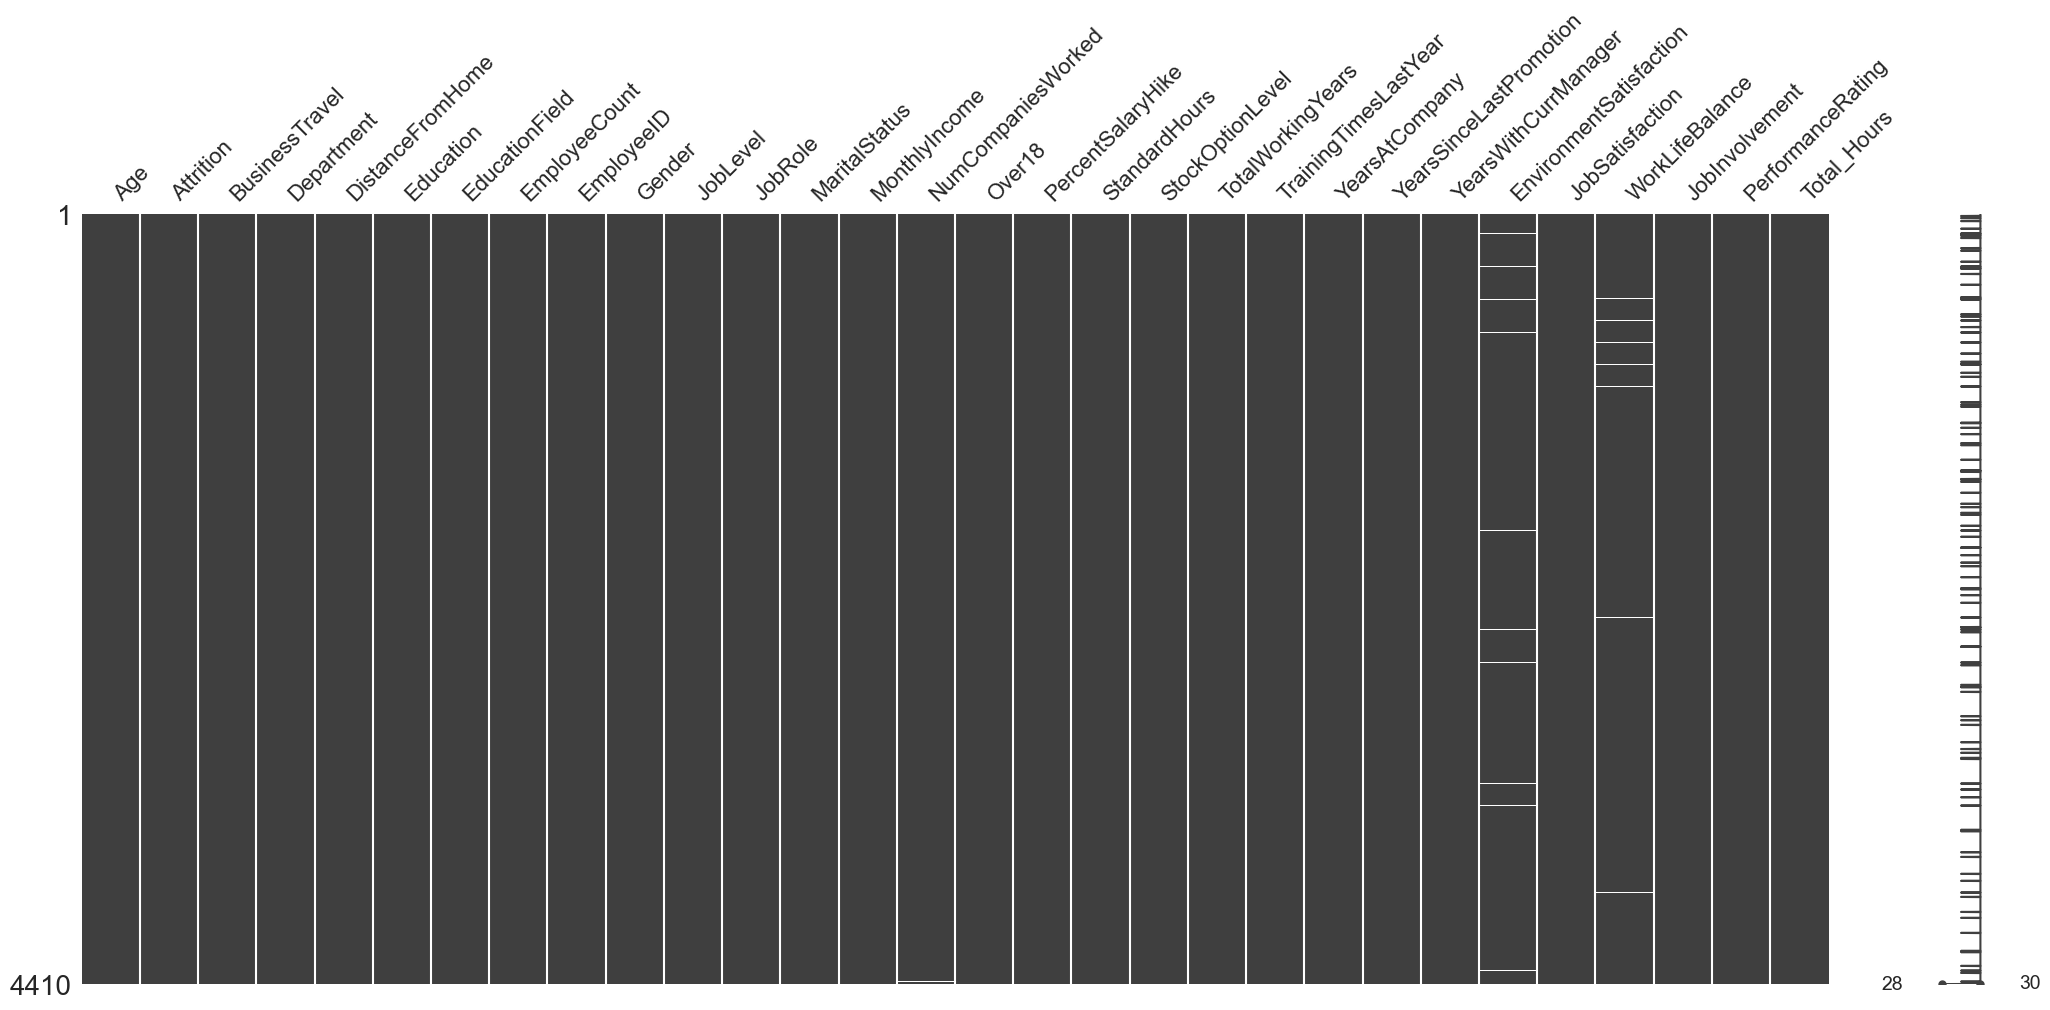

Valeurs manquantes par colonne :
NumCompaniesWorked : 19 valeurs
TotalWorkingYears : 9 valeurs
EnvironmentSatisfaction : 25 valeurs
JobSatisfaction : 20 valeurs
WorkLifeBalance : 38 valeurs


In [29]:
def missing_values(df):
    if (df.isnull().sum() > 0).any():
        missing_values = df.isnull().sum()[df.isnull().sum() > 0]
        msno.matrix(company_df)
        plt.show()
        print("Valeurs manquantes par colonne :")
        for col in missing_values.index:
            print(f"{col} : {missing_values[col]} valeurs")
    else:
        print("Il n'y a pas de valeurs manquantes dans le dataset")

missing_values(company_df)

---

### 6. <a id='doublons'>Detection des valeurs dupliquées</a>

In [12]:
if company_df.duplicated().sum() > 0:
    print(f"Nombre de valeurs dupliquées : {company_df.duplicated().sum()}")
    merged_dataset = company_df.drop_duplicates()
    print(f"Nombre de lignes après suppression des doublons : {merged_dataset.shape[0]}")
else:
    print("Il n'y a pas de valeurs dupliquées dans le dataset")

Il n'y a pas de valeurs dupliquées dans le dataset


---

### 7. <a id='types'>Vérification des types de données</a>

In [13]:
numerical_columns = company_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
       'Total_Hours'],
      dtype='object')


In [14]:
categorical_columns = company_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')


---

### 8. <a id='pipeline'>Pipeline de traitement des données</a>

Une fois les données catégorisées selon leur type, nous allons les traiter afin de les rendre exploitable par notre futur modèle.

In [15]:
num_features = numerical_columns.tolist()
cat_features = categorical_columns.tolist()


# Pipeline pour les variables numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    #https://scikit-learn.org/1.6/modules/generated/sklearn.preprocessing.RobustScaler.html
    ('scaler', RobustScaler())
])


# Pipeline pour les variables catégorielles
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline spécifique pour la colonne Attrition
attrition_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('bool_transform', FunctionTransformer(lambda x: x == 'Yes', validate=False))
])

# Pipeline de preprocessing
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, [col for col in cat_features if col != 'Attrition']),
    ('cat_specific', attrition_pipeline, ['Attrition'])
])


# Appliquer la transformation sur les données d'origine
company_transformed_df = preprocessor.fit_transform(company_df)

# Récupérer les noms des nouvelles colonnes catégorielles (OneHotEncoder)
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_one_hot_columns = cat_encoder.get_feature_names_out([col for col in cat_features if col != 'Attrition']).tolist()

# Ajouter la colonne `Attrition` traitée
final_columns = num_features + cat_one_hot_columns + ['Attrition']

processed_df = pd.DataFrame(company_transformed_df, columns=final_columns)
processed_df.head()


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Attrition
0,1.15,-0.08,-0.50,0.00,-1.00,-0.50,1.50,-0.33,-0.50,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
1,-0.38,0.25,-1.00,0.00,-1.00,-0.50,-0.13,-0.67,1.50,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
2,-0.31,0.83,0.50,0.00,-1.00,1.00,2.63,-0.33,0.17,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
3,0.15,-0.42,1.00,0.00,-1.00,0.50,0.62,0.33,-0.50,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
4,-0.31,0.25,-1.00,0.00,-1.00,-0.50,-0.47,0.67,-0.33,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00


In [30]:
missing_values(processed_df)

Il n'y a pas de valeurs manquantes dans le dataset


# <font color="red"><center>**WIP**</center></font>

In [17]:
correlation_matrix = processed_df.corr()
correlation_matrix

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Attrition
Age,1.00,0.01,-0.04,NaN,0.01,-0.00,-0.04,0.30,-0.03,NaN,...,0.00,-0.02,0.01,0.01,-0.01,0.03,0.08,-0.12,NaN,-0.16
DistanceFromHome,0.01,1.00,-0.01,NaN,-0.00,-0.04,-0.02,-0.01,0.04,NaN,...,0.00,-0.00,-0.00,-0.01,0.01,0.00,0.04,-0.04,NaN,-0.01
Education,-0.04,-0.01,1.00,NaN,-0.01,0.05,0.01,-0.02,-0.04,NaN,...,-0.01,0.05,0.00,-0.00,0.03,-0.02,-0.01,0.02,NaN,-0.02
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.01,-0.00,-0.01,NaN,1.00,-0.00,0.01,-0.00,-0.00,NaN,...,0.01,-0.00,-0.00,0.00,0.01,-0.00,0.00,0.00,NaN,-0.00
JobLevel,-0.00,-0.04,0.05,NaN,-0.00,1.00,0.05,-0.01,0.01,NaN,...,-0.00,0.03,0.02,-0.02,-0.02,0.01,0.01,-0.02,NaN,-0.01
MonthlyIncome,-0.04,-0.02,0.01,NaN,0.01,0.05,1.00,-0.02,0.00,NaN,...,0.03,0.00,-0.00,0.00,0.00,0.03,0.02,-0.05,NaN,-0.03
NumCompaniesWorked,0.30,-0.01,-0.02,NaN,-0.00,-0.01,-0.02,1.00,0.03,NaN,...,0.00,0.01,-0.02,-0.02,0.01,0.04,-0.02,-0.02,NaN,0.04
PercentSalaryHike,-0.03,0.04,-0.04,NaN,-0.00,0.01,0.00,0.03,1.00,NaN,...,-0.02,-0.01,-0.01,-0.04,0.07,0.00,-0.02,0.01,NaN,0.03
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
correlation_with_attrition = correlation_matrix['Attrition'].sort_values(ascending=False)

# Print the correlations with Attrition
print(correlation_with_attrition)

Attrition                            1.00
Total_Hours                          0.20
MaritalStatus_Single                 0.18
BusinessTravel_Travel_Frequently     0.12
EducationField_Human Resources       0.09
Department_Human Resources           0.08
JobRole_Research Director            0.05
NumCompaniesWorked                   0.04
PercentSalaryHike                    0.03
JobRole_Research Scientist           0.03
PerformanceRating                    0.02
Gender_Male                          0.02
EducationField_Life Sciences         0.01
JobRole_Sales Executive              0.01
JobRole_Laboratory Technician        0.00
EducationField_Medical               0.00
EducationField_Marketing            -0.00
EmployeeID                          -0.00
StockOptionLevel                    -0.01
DistanceFromHome                    -0.01
JobLevel                            -0.01
JobRole_Sales Representative        -0.01
JobRole_Healthcare Representative   -0.01
JobRole_Human Resources           

In [19]:

# Étape 2: Calcul de la matrice de corrélation pour toutes les variables numériques
num_columns = processed_df.select_dtypes(include=['int64', 'float64']).columns
# Étape 3: Filtrer les paires avec un coefficient de corrélation supérieur au seuil
# Définir le seuil (par exemple, 0.3)
seuil = 0.3

# Créer une liste pour stocker les paires de variables corrélées
correlated_pairs = []

# Parcourir la matrice de corrélation
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]

        # Ajouter la paire à la liste si la corrélation est supérieure au seuil
        if abs(corr_value) > seuil:
            correlated_pairs.append({'Variable 1': var1, 'Variable 2': var2, 'Correlation': corr_value})

# Convertir en DataFrame pour visualiser les résultats
correlated_pairs_df = pd.DataFrame(correlated_pairs)
positive_corr_df = correlated_pairs_df[correlated_pairs_df['Correlation'] > 0].sort_values(by='Correlation', ascending=False)
negative_corr_df = correlated_pairs_df[correlated_pairs_df['Correlation'] < 0].sort_values(by='Correlation')
# Afficher les paires avec une corrélation élevée
print("Paires de variables avec une corrélation significative :")
correlated_pairs_df


Paires de variables avec une corrélation significative :


,Variable 1,Variable 2,Correlation
0,Age,TotalWorkingYears,0.68
1,Age,YearsAtCompany,0.31
2,PercentSalaryHike,PerformanceRating,0.77
3,TotalWorkingYears,YearsAtCompany,0.63
4,TotalWorkingYears,YearsSinceLastPromotion,0.40
5,TotalWorkingYears,YearsWithCurrManager,0.46
6,YearsAtCompany,YearsSinceLastPromotion,0.62
7,YearsAtCompany,YearsWithCurrManager,0.77
8,YearsSinceLastPromotion,YearsWithCurrManager,0.51
9,BusinessTravel_Non-Travel,BusinessTravel_Travel_Rarely,-0.53


In [20]:
# Display both dataframes
positive_corr_df

,Variable 1,Variable 2,Correlation
2,PercentSalaryHike,PerformanceRating,0.77
7,YearsAtCompany,YearsWithCurrManager,0.77
0,Age,TotalWorkingYears,0.68
11,Department_Human Resources,EducationField_Human Resources,0.65
3,TotalWorkingYears,YearsAtCompany,0.63
6,YearsAtCompany,YearsSinceLastPromotion,0.62
14,Department_Sales,EducationField_Marketing,0.53
8,YearsSinceLastPromotion,YearsWithCurrManager,0.51
5,TotalWorkingYears,YearsWithCurrManager,0.46
4,TotalWorkingYears,YearsSinceLastPromotion,0.40


In [21]:
negative_corr_df

,Variable 1,Variable 2,Correlation
16,Gender_Female,Gender_Male,-1.00
12,Department_Research & Development,Department_Sales,-0.91
10,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,-0.75
19,MaritalStatus_Married,MaritalStatus_Single,-0.63
15,EducationField_Life Sciences,EducationField_Medical,-0.57
9,BusinessTravel_Non-Travel,BusinessTravel_Travel_Rarely,-0.53
17,MaritalStatus_Divorced,MaritalStatus_Married,-0.49
13,Department_Research & Development,EducationField_Marketing,-0.48
18,MaritalStatus_Divorced,MaritalStatus_Single,-0.37


In [22]:

# On sépare les données en train et test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(processed_df,processed_df['Attrition']):
    strat_train_set = processed_df.loc[train_index]
    strat_test_set = processed_df.loc[test_index]

# On a donc nos variables data_train_set et data_test_set pour le train et le test
data_train_set = strat_train_set.copy()
data_test_set = strat_test_set.copy()
data_train_set = data_train_set.drop(['Attrition'], axis=1)


objective_labels = strat_train_set["Attrition"].copy()
objective_labels

3465   0.00
3485   0.00
3052   1.00
2012   1.00
426    0.00
       ... 
743    0.00
613    1.00
808    0.00
2946   1.00
1125   0.00
Name: Attrition, Length: 3528, dtype: float64

In [23]:

X_train, X_test, y_train, y_test = train_test_split(data_train_set, objective_labels, test_size=0.2, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
pd.set_option('display.float_format', '{:.4f}'.format)
models_sorted = models.sort_values(by="Accuracy", ascending=False)
models_sorted

100%|██████████| 32/32 [00:04<00:00,  7.21it/s]

[LightGBM] [Info] Number of positive: 465, number of negative: 2357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.164777 -> initscore=-1.623107
[LightGBM] [Info] Start training from score -1.623107


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.9788,0.9438,0.9438,0.9784,0.1144
ExtraTreesClassifier,0.9759,0.9222,0.9222,0.9751,0.3889
RandomForestClassifier,0.9759,0.9222,0.9222,0.9751,0.4746
ExtraTreeClassifier,0.9660,0.9363,0.9363,0.9661,0.0161
LabelPropagation,0.9646,0.9275,0.9275,0.9645,0.6932
LabelSpreading,0.9646,0.9275,0.9275,0.9645,0.7422
BaggingClassifier,0.9632,0.8909,0.8909,0.9617,0.2772
DecisionTreeClassifier,0.9490,0.8985,0.8985,0.9490,0.0456
SVC,0.9263,0.7619,0.7619,0.9172,0.2178


In [24]:
# Initialisation et entraînement du modèle
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Matrice de confusion:\n", conf_matrix)
print("Rapport de classification:\n", class_report)


Accuracy: 0.9759
Matrice de confusion:
 [[601   1]
 [ 16  88]]
Rapport de classification:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       602
         1.0       0.99      0.85      0.91       104

    accuracy                           0.98       706
   macro avg       0.98      0.92      0.95       706
weighted avg       0.98      0.98      0.98       706



In [25]:
# Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Matrice de confusion:\n", conf_matrix)
print("Rapport de classification:\n", class_report)

Accuracy: 0.9759
Matrice de confusion:
 [[601   1]
 [ 16  88]]
Rapport de classification:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       602
         1.0       0.99      0.85      0.91       104

    accuracy                           0.98       706
   macro avg       0.98      0.92      0.95       706
weighted avg       0.98      0.98      0.98       706



In [26]:


model = Pipeline([
    ('classifier', LogisticRegression(random_state=42))
])

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_proba)

print(f'Accuracy: {accuracy:.4f}')
print('Matrice de confusion:\n', conf_matrix)
print('Rapport de classification:\n', report)
print(f'AUC-ROC: {auc_roc:.4f}')


Accuracy: 0.8697
Matrice de confusion:
 [[587  15]
 [ 77  27]]
Rapport de classification:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       602
         1.0       0.64      0.26      0.37       104

    accuracy                           0.87       706
   macro avg       0.76      0.62      0.65       706
weighted avg       0.85      0.87      0.85       706

AUC-ROC: 0.8106
